### Import Library

In [214]:
from matplotlib import pyplot as plt
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics.pairwise import manhattan_distances
import numpy as np
import pandas as pd
import string

stemmer = StemmerFactory().create_stemmer()
remover = StopWordRemoverFactory().create_stop_word_remover()

# Define function for preprocessing text (filtering and stemming)
def preprocess(text):
    text = text.lower()
    text_clean = remover.remove(text)
    text_stem = stemmer.stem(text_clean)
    result = ''.join([i for i in text_clean if not i.isdigit()])
    result = re.sub(r'[^\w\s]','',result)
    return result

### Load Dataset

In [215]:
dataset = pd.read_excel("dataset.xlsx")
dataset

,NO,TAHUN,NAMA MAHASISWA,NIM,JUDUL KERJA PRAKTEK,LABEL
0,1,2012,Ahsin Zahidan,5018132,Pelatihan microsoft office word dan excel 2007,P
1,2,2012,Landuh Ilham Satria,5018236,Sistem informasi perpustakaan SMPN 1 sembalun,S
2,3,2012,Kurnia Mazida,5018123,Sistem administrasi pernikahan kantor urusan a...,NaN
3,4,2012,Zulkarnain,8018304,Pelatihan pengenalan komputer,P
4,5,2012,Heru Kurniawan,701301,Pelatihan microsoft excel 2007 dengan adobe ph...,P
5,6,2012,Didid Prayogo,5018167,Web profil asrama mangkaliat,W
6,7,2012,Alfan Fikri Muchtar,7018255,Dokumentasi Sistem Kegiatan kemahasiswaan,NaN
7,8,2012,Dalies Muqhita,8018200,Sosialisasi dan pengembangan sistem e-learning...,P
8,9,2012,Faza Akmal,8018244,Sosialisasi dan pengembangan sistem e-learning...,P
9,10,2012,Resagita Amara Puspa,8018274,Laporan kerja praktek pelatihan microsoft offi...,P


### Preprocessing Titles

In [216]:
titles_preprocess = list()
for title in dataset["JUDUL KERJA PRAKTEK"]:
    titles_preprocess.append(preprocess(title))
titles_preprocess

['pelatihan microsoft office word excel ',
 'sistem informasi perpustakaan smpn  sembalun',
 'sistem administrasi pernikahan kantor urusan agama kecamatan batang',
 'pelatihan pengenalan komputer',
 'pelatihan microsoft excel  adobe photoshop cs puskesmas nanggulan',
 'web profil asrama mangkaliat',
 'dokumentasi sistem kegiatan kemahasiswaan',
 'sosialisasi pengembangan sistem elearning bentuk pelatihan',
 'sosialisasi pengembangan sistem elearning bentuk pelatihan',
 'laporan kerja praktek pelatihan microsoft office tenaga pengajar tata usaha sman  pacitan',
 'analisis software iaas intergrated apotek aplication system apotek uad',
 'pelatihan dasar internet email',
 'pendataan alumni online penambahan modul guru pegawai prestasi website mtsn piyungan bantul',
 'pelatihan media presentasi microsoft power point pembuatan desain slide menggunakan corel draw guru smpn  semanu gunungkidul',
 'sosialisasi pembuatan video tutorial penggunaan sistem e learning universitas ahmad dahlan',
 'p

### Get Tokenization of Preprocessing Titles

In [217]:
documents = list()
for title in titles_preprocess:
    words = list()
    word_tokens = title.split(" ")
    for word in word_tokens:
        if word is not "": # Remove white space items
            words.append(word)
    documents.append(words)
documents

[['pelatihan', 'microsoft', 'office', 'word', 'excel'],
 ['sistem', 'informasi', 'perpustakaan', 'smpn', 'sembalun'],
 ['sistem',
  'administrasi',
  'pernikahan',
  'kantor',
  'urusan',
  'agama',
  'kecamatan',
  'batang'],
 ['pelatihan', 'pengenalan', 'komputer'],
 ['pelatihan',
  'microsoft',
  'excel',
  'adobe',
  'photoshop',
  'cs',
  'puskesmas',
  'nanggulan'],
 ['web', 'profil', 'asrama', 'mangkaliat'],
 ['dokumentasi', 'sistem', 'kegiatan', 'kemahasiswaan'],
 ['sosialisasi', 'pengembangan', 'sistem', 'elearning', 'bentuk', 'pelatihan'],
 ['sosialisasi', 'pengembangan', 'sistem', 'elearning', 'bentuk', 'pelatihan'],
 ['laporan',
  'kerja',
  'praktek',
  'pelatihan',
  'microsoft',
  'office',
  'tenaga',
  'pengajar',
  'tata',
  'usaha',
  'sman',
  'pacitan'],
 ['analisis',
  'software',
  'iaas',
  'intergrated',
  'apotek',
  'aplication',
  'system',
  'apotek',
  'uad'],
 ['pelatihan', 'dasar', 'internet', 'email'],
 ['pendataan',
  'alumni',
  'online',
  'penambaha

### Get List of Vocabulary
#### Vocabulary should be unique

In [218]:
vocab = set(list())
for doc in documents:
    vocab.update(doc)
vocab = list(vocab)
vocab

['usaha',
 'kerja',
 'proses',
 'adobe',
 'semanu',
 'mengetik',
 'mtsn',
 'membangun',
 'kecamatan',
 'dahlan',
 'pencari',
 'karyawan',
 'sosialisasi',
 'website',
 'pegawai',
 'gunungkidul',
 'aplication',
 'c',
 'perpustakaan',
 'negeri',
 'uad',
 'bentuk',
 'tenaga',
 'cs',
 'publikasi',
 'inspire',
 'pengajar',
 'word',
 'pemanfaatan',
 'draw',
 'point',
 'piyungan',
 'pembuatan',
 'web',
 'prestasi',
 'smpn',
 'agama',
 'alumni',
 'macromedia',
 'informasi',
 'muhammadiyah',
 'email',
 'karangmojo',
 'power',
 'kantor',
 'intergrated',
 'iaas',
 'sleman',
 'lectora',
 'flash',
 'yogyakarta',
 'administrasi',
 'kegiatan',
 'software',
 'office',
 'desain',
 'menggunakan',
 'slb',
 'studio',
 'profil',
 'komputer',
 'pengembangan',
 'excel',
 'pembelajaran',
 'elearning',
 'bantul',
 'media',
 'animasi',
 'sekretariat',
 'konten',
 'batang',
 'institut',
 'universitas',
 'urusan',
 'modul',
 'online',
 'sembalun',
 'editing',
 'upt',
 'lelayu',
 'dokumentasi',
 'ring',
 'analisis'

### Get Term Frequency and Inverse Document Frequency (TF - IDF)
#### Get Term Frequency

In [219]:
tf = np.zeros((len(documents), len(vocab)))
for row, document in enumerate(documents):
    for word in document:
        if word in vocab:
            column = vocab.index(word)
            tf[row, column] += 1
pd.DataFrame(tf.transpose())

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Term Frequency Divided by The Total Number of Words in The Document

In [220]:
n_word_documents = tf.sum(axis=1)
n_word_documents

array([ 5.,  5.,  8.,  3.,  8.,  4.,  4.,  6.,  6., 12.,  9.,  4., 12.,
       16., 11.,  8.,  7.,  8.,  8., 10.,  4., 13.,  3.,  7.,  9., 10.,
        5.,  4.,  9.,  9.])

#### Get Inverse Document Frequency

In [221]:
n_documents = len(documents) # Get scalar of documents
n_documents_words = (tf > 0).sum(axis=0)  # 1 x M
idf = np.log10((float(n_documents) / n_documents_words)) # Log 10(n_documents / n_documents_word)
idf

array([1.47712125, 1.47712125, 1.47712125, 1.17609126, 0.87506126,
       1.47712125, 1.47712125, 1.47712125, 1.47712125, 1.47712125,
       1.47712125, 1.17609126, 1.        , 1.47712125, 1.47712125,
       1.        , 1.47712125, 1.47712125, 1.17609126, 1.47712125,
       1.47712125, 1.17609126, 1.17609126, 1.47712125, 1.47712125,
       1.47712125, 1.47712125, 1.        , 1.47712125, 1.47712125,
       1.17609126, 1.47712125, 0.87506126, 1.17609126, 1.47712125,
       0.87506126, 1.47712125, 1.47712125, 1.47712125, 1.47712125,
       1.47712125, 1.47712125, 1.17609126, 1.17609126, 1.47712125,
       1.47712125, 1.47712125, 1.47712125, 1.47712125, 1.47712125,
       1.47712125, 1.47712125, 1.47712125, 1.47712125, 0.77815125,
       1.47712125, 1.17609126, 1.47712125, 1.47712125, 1.17609126,
       1.47712125, 1.17609126, 0.77815125, 1.        , 1.17609126,
       1.47712125, 0.87506126, 1.47712125, 1.47712125, 1.47712125,
       1.47712125, 1.17609126, 1.47712125, 1.47712125, 1.47712

#### Get TF - IDF

In [222]:
tf_idf = tf * idf  # (N x M) * (1 x M)
pd.DataFrame(tf_idf.transpose())

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.477121,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.477121,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,1.477121,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.000000,0.000000,0.0,1.176091,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.875061,0.000000,0.000000,0.000000
5,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.477121,0.000000,0.000000
6,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.0,0.000000,1.477121,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Get Similarity with Manhattan Distance

In [223]:
manhattan = manhattan_distances(tf_idf, tf_idf, sum_over_features=True)
pd.DataFrame(manhattan)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.000000,8.846933,14.181387,5.987666,8.084576,8.515940,8.272902,8.193721,8.193721,14.169153,...,4.908485,21.509001,6.494751,10.816970,10.640879,14.169153,8.186881,7.464788,6.181486,5.959638
1,8.846933,0.000000,15.345244,8.767752,13.375207,10.943843,9.436759,9.709760,9.709760,19.459783,...,8.642813,23.936905,5.306425,13.597056,15.931510,16.949238,8.864662,10.244873,13.028420,13.250268
2,14.181387,15.345244,0.000000,14.102206,18.709661,16.278297,14.771213,15.044214,15.044214,24.794237,...,13.977267,29.271358,12.993061,18.931510,21.265963,22.283692,15.949238,15.579327,18.362873,18.584722
3,5.987666,8.767752,14.102206,0.000000,10.515940,8.436759,8.193721,8.114540,8.114540,16.600516,...,5.783546,21.429820,6.415569,10.737789,13.072243,14.089971,8.107700,7.385606,10.169153,10.391001
4,8.084576,13.375207,18.709661,10.515940,0.000000,13.044214,12.801176,12.721995,12.721995,20.253729,...,9.436759,26.037275,11.023025,15.345244,15.169153,18.697426,12.715155,11.993061,12.266063,14.044214
5,8.515940,10.943843,16.278297,8.436759,13.044214,0.000000,10.369812,10.642813,10.642813,19.128790,...,8.311820,23.605911,8.591661,13.266063,15.600516,16.618245,5.579426,9.913880,12.697426,12.919275
6,8.272902,9.436759,14.771213,8.193721,12.801176,10.369812,0.000000,9.135729,9.135729,18.885752,...,8.068782,23.362873,7.084576,13.023025,15.357478,16.375207,10.040753,9.670842,12.454388,12.676237
7,8.193721,9.709760,15.044214,8.114540,12.721995,10.642813,9.135729,0.000000,0.000000,18.806571,...,7.989601,23.635875,7.357578,12.943843,15.278297,16.296026,10.313755,9.591661,12.375207,12.597056
8,8.193721,9.709760,15.044214,8.114540,12.721995,10.642813,9.135729,0.000000,0.000000,18.806571,...,7.989601,23.635875,7.357578,12.943843,15.278297,16.296026,10.313755,9.591661,12.375207,12.597056
9,14.169153,19.459783,24.794237,16.600516,20.253729,19.128790,18.885752,18.806571,18.806571,0.000000,...,15.521335,32.121851,17.107601,21.429820,22.810031,20.077638,18.799731,18.077638,18.350639,18.572488


### Get Clusters with Single Linkage

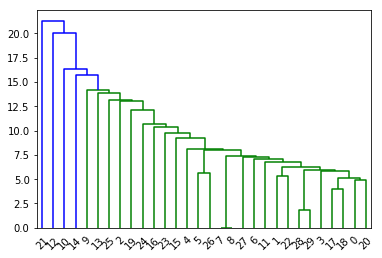

In [224]:
clusters = linkage(tf_idf, 'single', 'cityblock')
dendrogram(clusters)
plt.savefig("diagram.png")

### Define N Cluster

In [225]:
n_cluster = 3

### Get Dictionary of Clusters

In [226]:
cluster_dict = {i: [i] for i in range(len(clusters) + 1)}
for i in range(len(clusters) - n_cluster + 1):
    cluster1 = int(clusters[i][0])
    cluster2 = int(clusters[i][1])
    cluster_dict[max(cluster_dict) + 1] = cluster_dict[cluster1] + cluster_dict[cluster2]
    del cluster_dict[cluster1], cluster_dict[cluster2]
cluster_dict

{12: [12],
 21: [21],
 56: [10,
  14,
  9,
  13,
  25,
  2,
  19,
  24,
  16,
  23,
  15,
  4,
  5,
  26,
  7,
  8,
  27,
  6,
  11,
  1,
  22,
  28,
  29,
  3,
  17,
  18,
  0,
  20]}

### Visualization for Clusters with DataFrame

In [227]:
# Define column CLUSTER on dataset with default value ""
dataset["CLUSTER"] = ["" for i in range(len(dataset["JUDUL KERJA PRAKTEK"]))]

cluster = 0
for i in cluster_dict:
    for j in cluster_dict[i]:
        dataset["CLUSTER"][j] = cluster
    cluster += 1
dataset

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,NO,TAHUN,NAMA MAHASISWA,NIM,JUDUL KERJA PRAKTEK,LABEL,CLUSTER
0,1,2012,Ahsin Zahidan,5018132,Pelatihan microsoft office word dan excel 2007,P,2
1,2,2012,Landuh Ilham Satria,5018236,Sistem informasi perpustakaan SMPN 1 sembalun,S,2
2,3,2012,Kurnia Mazida,5018123,Sistem administrasi pernikahan kantor urusan a...,NaN,2
3,4,2012,Zulkarnain,8018304,Pelatihan pengenalan komputer,P,2
4,5,2012,Heru Kurniawan,701301,Pelatihan microsoft excel 2007 dengan adobe ph...,P,2
5,6,2012,Didid Prayogo,5018167,Web profil asrama mangkaliat,W,2
6,7,2012,Alfan Fikri Muchtar,7018255,Dokumentasi Sistem Kegiatan kemahasiswaan,NaN,2
7,8,2012,Dalies Muqhita,8018200,Sosialisasi dan pengembangan sistem e-learning...,P,2
8,9,2012,Faza Akmal,8018244,Sosialisasi dan pengembangan sistem e-learning...,P,2
9,10,2012,Resagita Amara Puspa,8018274,Laporan kerja praktek pelatihan microsoft offi...,P,2
